In [4]:
library("cowplot")
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(parallel))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(plyr))
suppressPackageStartupMessages(library(stringr))

In [5]:
Olink_Result<-read.csv('01_Olink/Olink_lm_Result.csv')

In [6]:
Olink_Result<-Olink_Result %>% filter(factor=='Age')


In [13]:
data <- Olink_Result%>% dplyr::mutate(Expression = case_when(delta_changes_Age >=0.1 & padj <= 0.05 ~ "Up-Older",
                                                     delta_changes_Age <= -0.1 & padj <= 0.05 ~ "Up-Young",
                                                     TRUE ~ "Unchanged"))

top <- 15
top_genes <- data %>%
  filter(Expression %in% c('Up-Older', 'Up-Young')) %>%
  group_by(Expression) %>%
  arrange(padj, desc(abs(delta_changes_Age))) %>%
  slice_head(n = top) %>%
  ungroup()

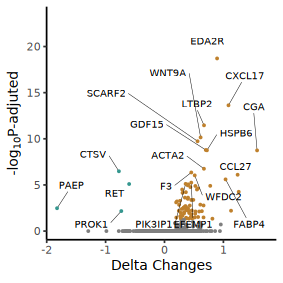

In [14]:
options(repr.plot.width = 60/25.4, repr.plot.height = 60/25.4)

p <- ggplot(data, aes(delta_changes_Age, -log10(padj))) +
  geom_point(aes(color = Expression), size = 0.8, stroke = 0, show.legend = FALSE) +
  xlab(expression("Delta Changes")) + 
  ylab(expression("-log"[10]*"P-adjuted")) +
  scale_color_manual(values = c("Up-Older" = '#bf812d', "Unchanged" = "gray50", "Up-Young" = '#35978f')) +
  guides(colour = guide_legend(override.aes = list(size = 1.5)), alpha = "none") +
  geom_text_repel(
    data = top_genes,
    box.padding = 0.5,
    force = 0.5,
    max.overlaps = 50,
    nudge_x = 0.15,
    hjust = 0.1,
    segment.size = 0.1,
    mapping = aes(label = Assay),
    size = 2
  ) +
  theme(legend.position = "none") +
  theme_classic(base_size = 8)+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.3)))

p

ggsave(filename = "FigureB.pdf", plot = p, width = 60/25.4, height = 60/25.4)